## Лабораторна робота 6. **Unsupervised Learning**

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

## Кластерування  

В цій лабораторній роботі Ви будете вирішувати задачу класифікації БЕЗ вчителя. 

In [27]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline 

import os
import warnings


warnings.filterwarnings('ignore')

**Завдання 0** 

Для початку необхідно завантажити вибірку `Mall_Customers` і перейменувати атрибути `Annual Income (k$)` в `Income`,`Spending Score (1-100)` в `SpendingScore`

In [28]:
customer_set = pd.read_csv('Task6_Unsupervised.csv')
customer_set.rename(columns={'Annual Income (k$)':'Income', 'Spending Score (1-100)':'SpendingScore'}, inplace=True)
customer_set

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


**Завдання 1** 

Підготовка даних до опрацювання

* подивитись які атрибути містить вибірка; 
* вивести розмірність датасету;
* вивести основну статистичну інформацію по числовим змінним;  
* перевірити на наявність `NaN`.   

In [29]:
customer_set.columns

Index(['CustomerID', 'Gender', 'Age', 'Income', 'SpendingScore'], dtype='object')

In [30]:
customer_set.shape

(200, 5)

In [31]:
customer_set.describe()

,CustomerID,Age,Income,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [32]:
customer_set.isnull().sum()

CustomerID       0
Gender           0
Age              0
Income           0
SpendingScore    0
dtype: int64

## EDA Mall Customers

**Завдання 2** 

Як Ви могли помітити по статистичній аналітиці вибірки вона містить змінну `CustomerID`. Ця змінна не впливає на аналіз даних тому її можна видалити.

In [33]:
customer_set = customer_set.drop(["CustomerID"], axis=1)

**Завдання 3** 

Побудувати діаграми розподілу по змінним `Age` , `Income` та `SpendingScore`

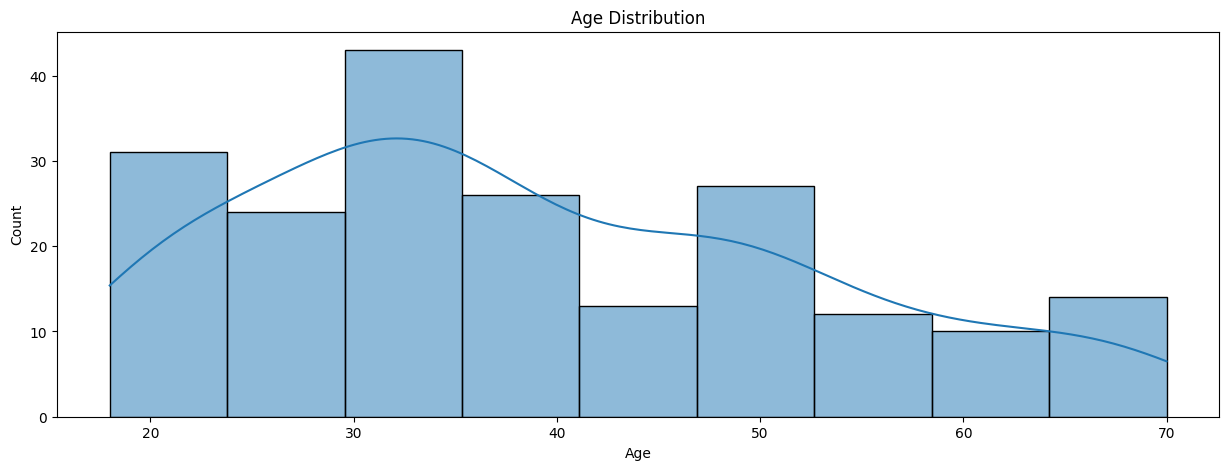

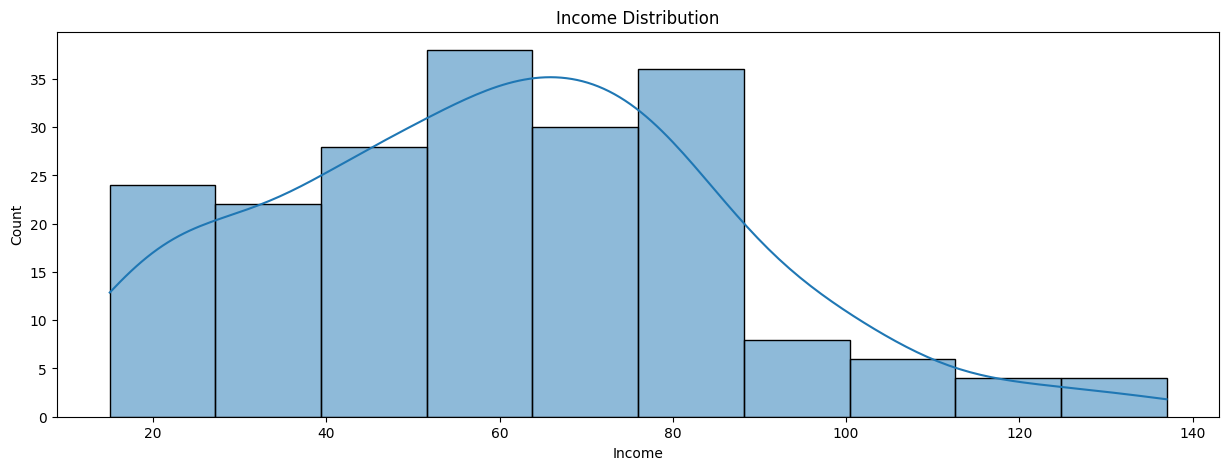

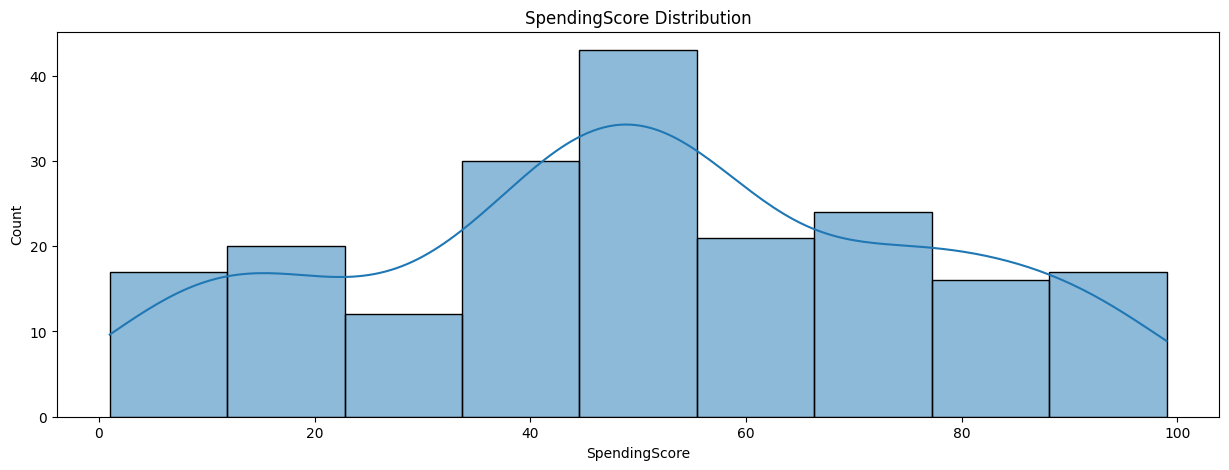

In [34]:
for col in customer_set.columns:
    if col != 'Gender':
        fig = plt.figure(figsize=(15, 5))
        plt.title(f'{col} Distribution')
        sns.histplot(x=customer_set[col], kde=True)
        plt.show()

**Завдання 4** 

Давайте подивимось на ці змінні `Age` , `Income` та `SpendingScore` відносно змінної `Gender`. 
* Побудуємо `pairplot` по всім змінним відностно змінної `Gender`:  
 
* Побудуємо `pairplot` використовуючи `sns.PairGrid` із заданими `(scatterplot)`, `(kdeplot)` та `(kdeplot, lw=1)` по відповідно правому верхньому куту, діагоналі і лівому нижньому кутут відносно змінної `Gender`:  
 

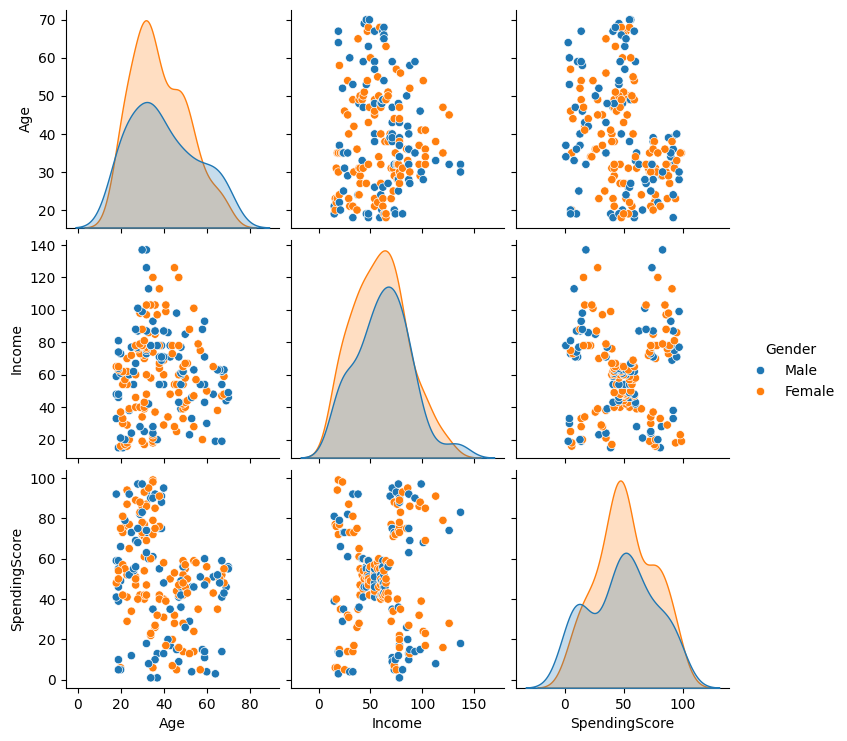

In [35]:
sns.pairplot(customer_set, hue='Gender')
plt.show()

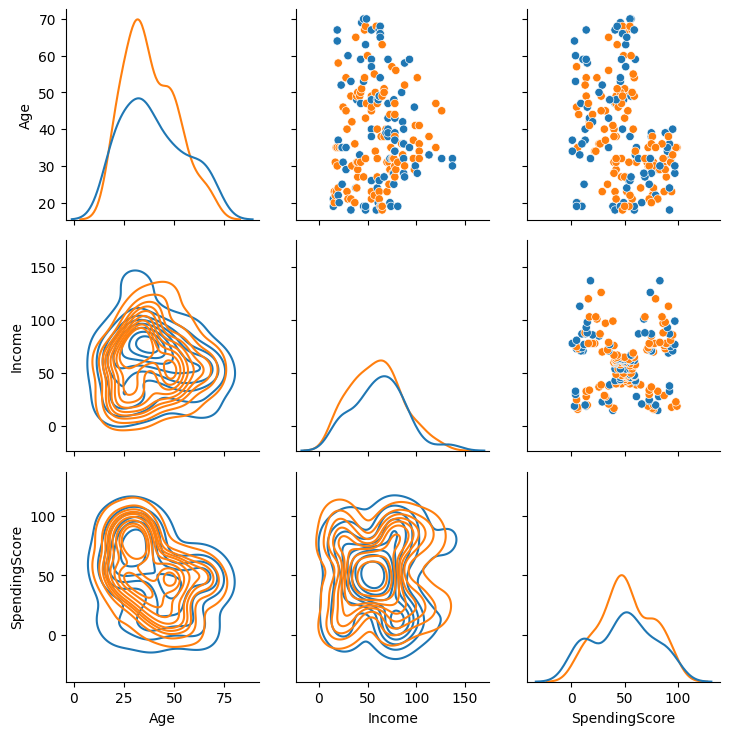

In [36]:
pargrid = sns.PairGrid(customer_set, hue='Gender')
pargrid.map_upper(sns.scatterplot)
pargrid.map_lower(sns.kdeplot, lw=1)
pargrid.map_diag(sns.kdeplot)
plt.show()

**Висновки з 1-4 завдання (детальні)**

1. В нас є колонки `CustomerID`, `Gender`, `Age`, `Income`, `SpendingScore`. Датасет 200 на 5 і це найменший з яким ми працювали на курсі. 
2. Пропуски відсутні.
3. Середній вік 38.8.
4. Ми видалили `CustomerID` бо це інкрементальне значення яке немає статистичної цінності для нас.
5. Більшість людей мають дохід до приблизно 90 тисяч. Найбільше витрат в районі 40-55 тисяч. Найбільше клієнтів 30-35 років. Клієнти зазвичай витрачають половину свого доходу.
6. На пейрплоті помічено 5 кластерів в `Income` та `SpendingScore`.

**Завдання 5** 

Проаналізувати змінну `Gender`:
* вивести співвідношення по статям;
* побудувати `countplot` по `Gender`;  
* побудувати `pie`по `Gender'.  

In [37]:
gender_corr = customer_set['Gender'].value_counts()
gender_corr

Gender
Female    112
Male       88
Name: count, dtype: int64

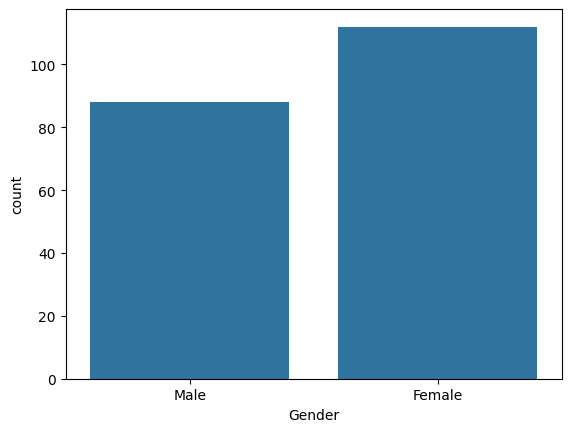

In [38]:
sns.countplot(data=customer_set, x='Gender')
plt.show()

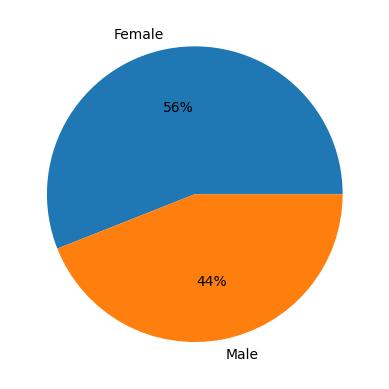

In [39]:
plt.pie(gender_corr, labels=gender_corr.index, autopct='%.0f%%')
plt.show()

**Завдання 6** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінних `Age` та `Income` відносно змінної `Gender` з різними параметрами:
*  подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`.

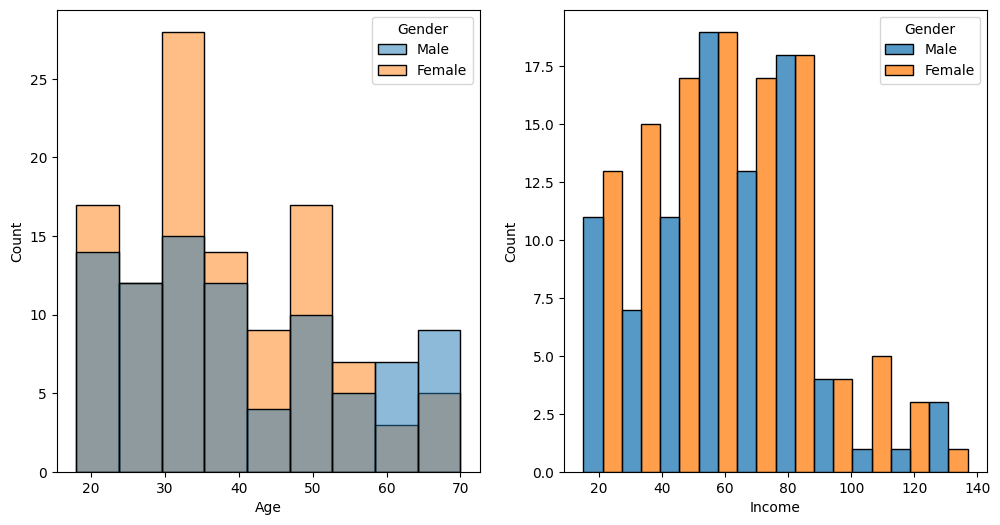

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(customer_set, x='Age', hue="Gender", multiple='layer', ax=axs[0])
sns.histplot(customer_set, x='Income', hue="Gender", multiple='dodge', ax=axs[1])
plt.show()

**Завдання 7** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінної `SpendingScore` відносно змінної `Gender` з різними параметрами:  
* подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`. 



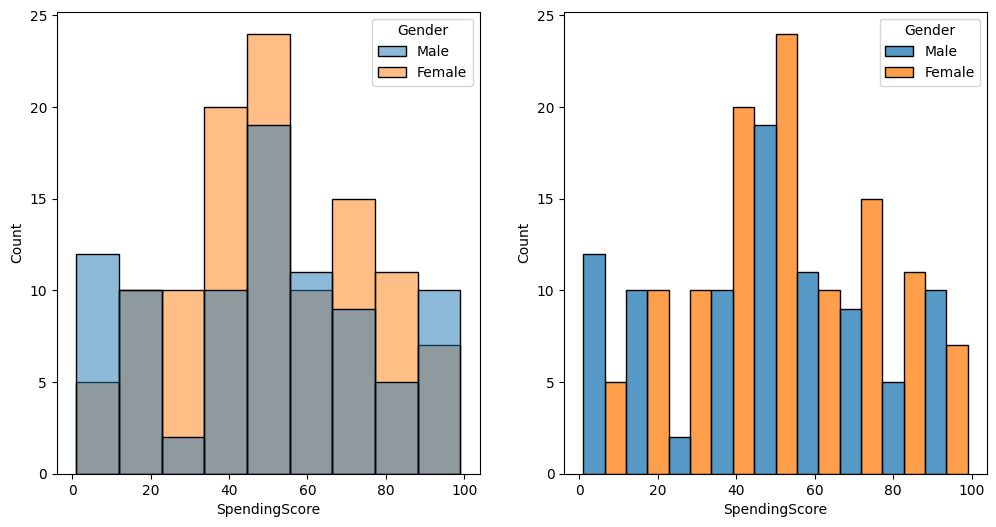

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(customer_set, x='SpendingScore', hue="Gender", multiple='layer', ax=axs[0])
sns.histplot(customer_set, x='SpendingScore', hue="Gender", multiple='dodge', ax=axs[1])
plt.show()

**Завдання 8** 

Побудувати `boxplot` по змінній `SpendingScore` і подивитись як відрізняються витрати відностно змінної `Gender`. 

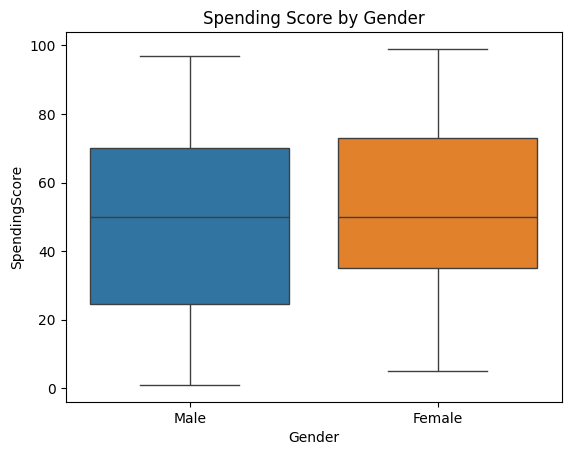

In [42]:
sns.boxplot(customer_set, y='SpendingScore', x='Gender', hue='Gender')
plt.title('Spending Score by Gender')
plt.show()


**Висновки з завдання 5 - 8(детальні)**

1. На 100 жінок припадає приблизно 79 чоловіків.
2. Можна виділити вікові групи молоді, середній вік, люди пенсійного віку. Також можна погрупувати по рівню доходів низькі, середні, високі. Більшість людей незалежно від статі заробляє в діапазоні від 20 до 90 тисяч. Жінки переважають чоловіків у діапазоні 40-80 тисяч.
3. Жінки тратять більше.
4. В обох статей медіана приблизно однакова що говорить про одинакові середні рівні витрат. Ширина ящику жінок має на 10 вище мінімальне значення та на 5 вище максимальне. У чоловіків мінімальне значення витрпт метше ніж у жінок.

## K-means Method ##

**Завдання 9** 

Як Ви могли помітити, вибірка, з якою ми працюємо, не містить ключової зміної з вірними мітками. Тому перед початком кластерування необхідно визначити (підібрати) оптимальну кількість кластерів на яке буде проведено розбиття. Для цього необхідно:
1. видалити змінну `Gender`, тому що це не вливає на дослідження і видалення `Gender` допомагає уникнути упереджень.
2. задати мінімальну та максимальну кількість кластерів самостійно;  
3. На прикладі алгоритму [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), для ознайомлення з тим як працювати в умовах коли кількість кластерів невідома заздалегіть і немає вірних міток з позначками до якого кластеру відноситься спостереження пропонується використати метод [Elbow](https://coderoad.ru/19197715/Scikit-Learn-K-Means-Elbow-criterion) (додаткові джерела: [article_1](https://medium.com/analytics-vidhya/elbow-method-of-k-means-clustering-algorithm-a0c916adc540#:~:text=K%2Dmeans%20clustering%20is%20an,cluster%20with%20the%20nearest%20centroid.), [article_2](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/))

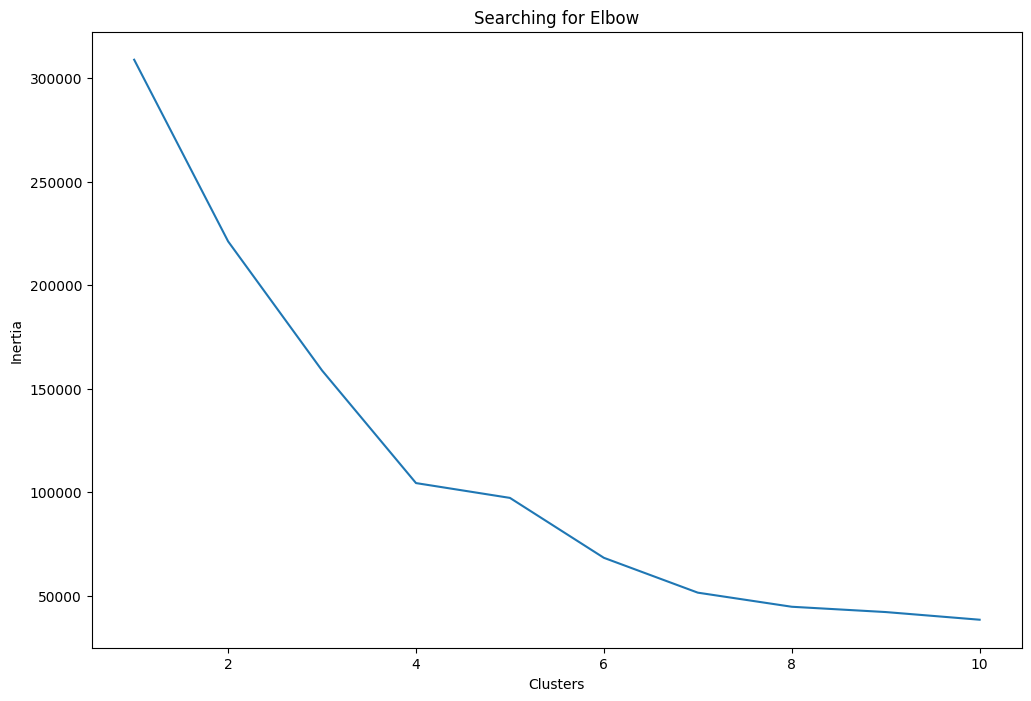

In [43]:
X = customer_set.drop(['Gender'], axis=1)
clusters = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    clusters.append(kmeans.inertia_)


    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')


plt.show()

**Висновки з завдання 9 (детальні)** 

1. На основі elbow можна припусти про наявність 4-6 кластерів.

**Завдання 10** 

Зробити двовимірну візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи змінні `Income` та `SpendingScore`. 

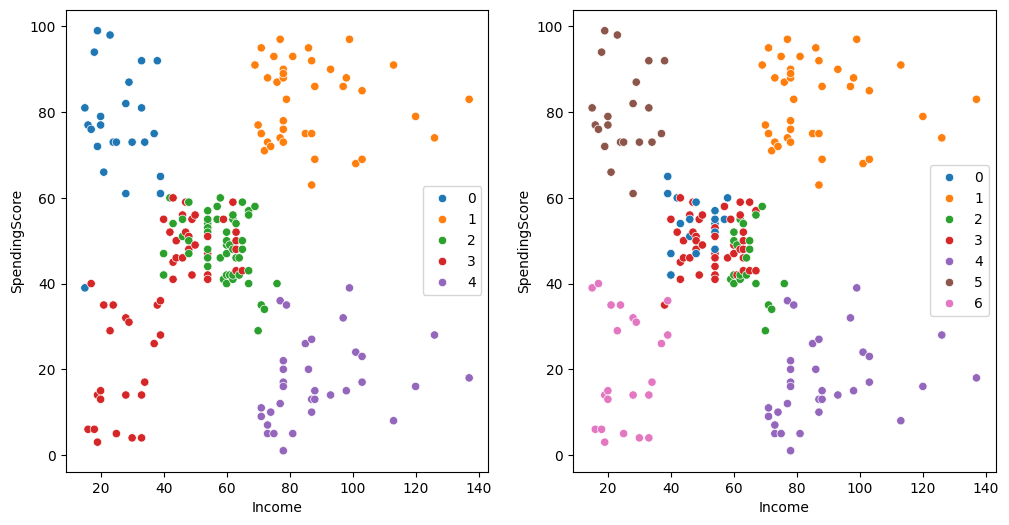

In [44]:
kmeans5 = KMeans(n_clusters=5, random_state=40).fit(X)
kmeans7 = KMeans(n_clusters=7, random_state=40).fit(X)


fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(customer_set, x='Income', y='SpendingScore', hue=kmeans5.labels_, ax=axs[0], palette='tab10')
sns.scatterplot(customer_set, x='Income', y='SpendingScore', hue=kmeans7.labels_, ax=axs[1], palette='tab10')

plt.show()

**Завдання 11** 

Зробити візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи [scatter_3d](https://plotly.com/python/3d-scatter-plots/).

In [45]:
fig1 = px.scatter_3d(customer_set,  x='Income', y='SpendingScore', z='Age', symbol=kmeans5.labels_, color=kmeans5.labels_, opacity=0.6)
fig1.show()

fig2 = px.scatter_3d(customer_set,  x='Income', y='SpendingScore', z='Age', symbol=kmeans7.labels_, color=kmeans7.labels_, opacity=0.6)
fig2.show()


**Висновки з завдання 10 - 11 (детальні)** 

1. 5 кластирів є оптимальною кількістю бо якщо збільшувати кількість далі то ці кластери хибно розбиваються на менші.
2. 3D візуалізація це підтверджує.

## Agglomerative clustering ##

Розглянемо ще один підхід до кластеризації - [агломеративну ієрархічну кластеризацію](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

**Завдання 12** 

Кластеризуйте датасет за допомогою [агломеративної ієрархічнуої кластеризації](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

Мінімально необхідні параметри, що треба налаштувати:  
* `n_clusters`: параметр, який відповідає за кільксіть кластерів на яку буде проведено розбиття вибірки;  
* `linkage`: параметр зв’язку. Цей параметр визначає, яку відстань використовувати між наборами спостережень.
* перевірте як працює цей метод з різними параметрами `linkage`  
* після кожної зміни параметрів - візуалізувати розбиття на кластери

Розрахувати матрицю відстаней для нашого набору даних:
* за допомогою методу [hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) і матриці відстаней кластеризувати дані з різними значеннями параметра `method`
* за допомогою методу [hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) візуалізувати отримані результати кластеризації у вигляді дендрограм


In [46]:
d_mat = distance_matrix(X.values, X.values)


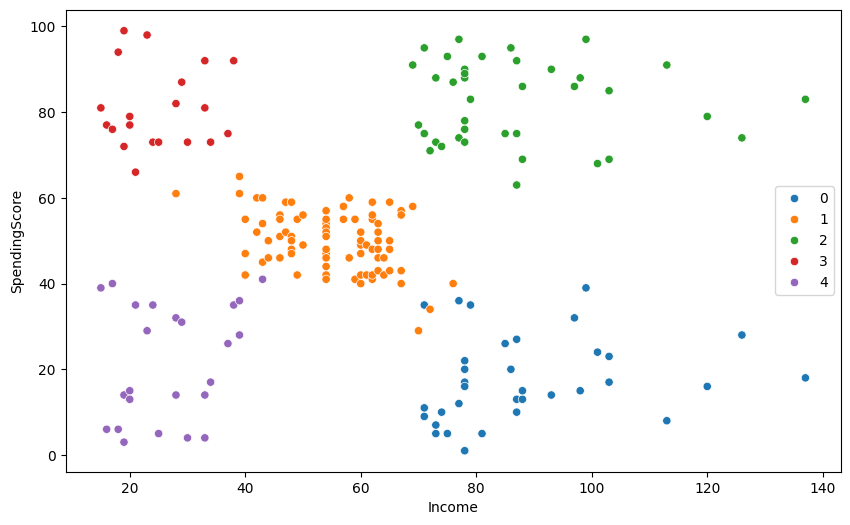

In [47]:
clustering = AgglomerativeClustering(n_clusters=5, linkage='average')

clustering.fit(X)


plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_set, x='Income', y='SpendingScore', hue=clustering.labels_,palette='tab10')
plt.show()

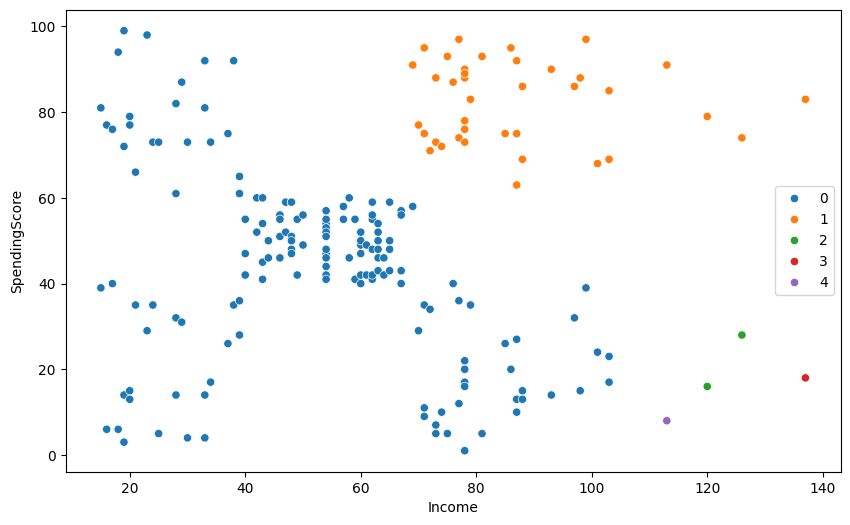

In [48]:
clustering = AgglomerativeClustering(n_clusters=5, linkage='single')

clustering.fit(X)


plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_set, x='Income', y='SpendingScore', hue=clustering.labels_,palette='tab10')
plt.show()

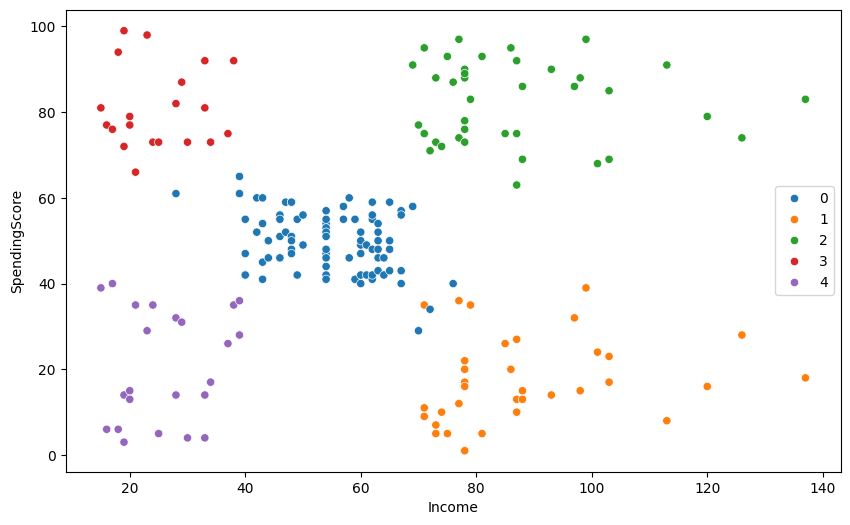

In [49]:
clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')

clustering.fit(X)


plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_set, x='Income', y='SpendingScore', hue=clustering.labels_,palette='tab10')
plt.show()

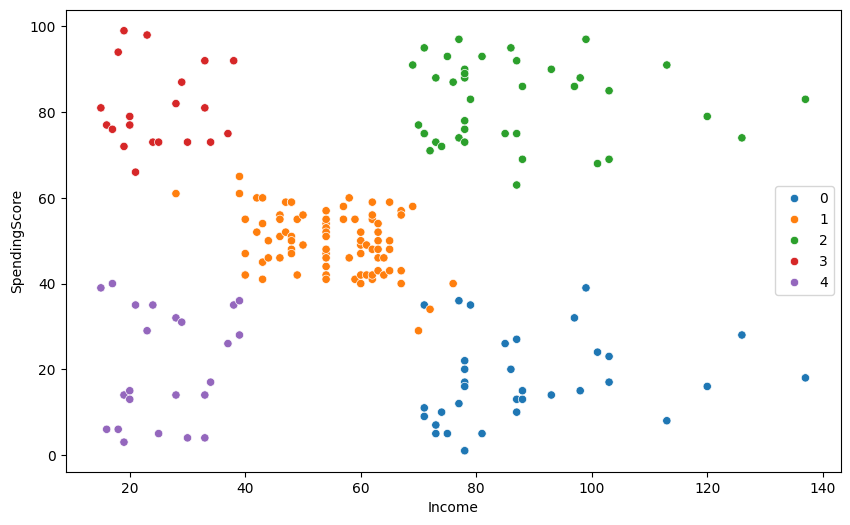

In [50]:
clustering = AgglomerativeClustering(n_clusters=5, linkage='complete')
labels = clustering.fit_predict(X)
clustering.fit(X)


plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_set, x='Income', y='SpendingScore', hue=clustering.labels_,palette='tab10')
plt.show()


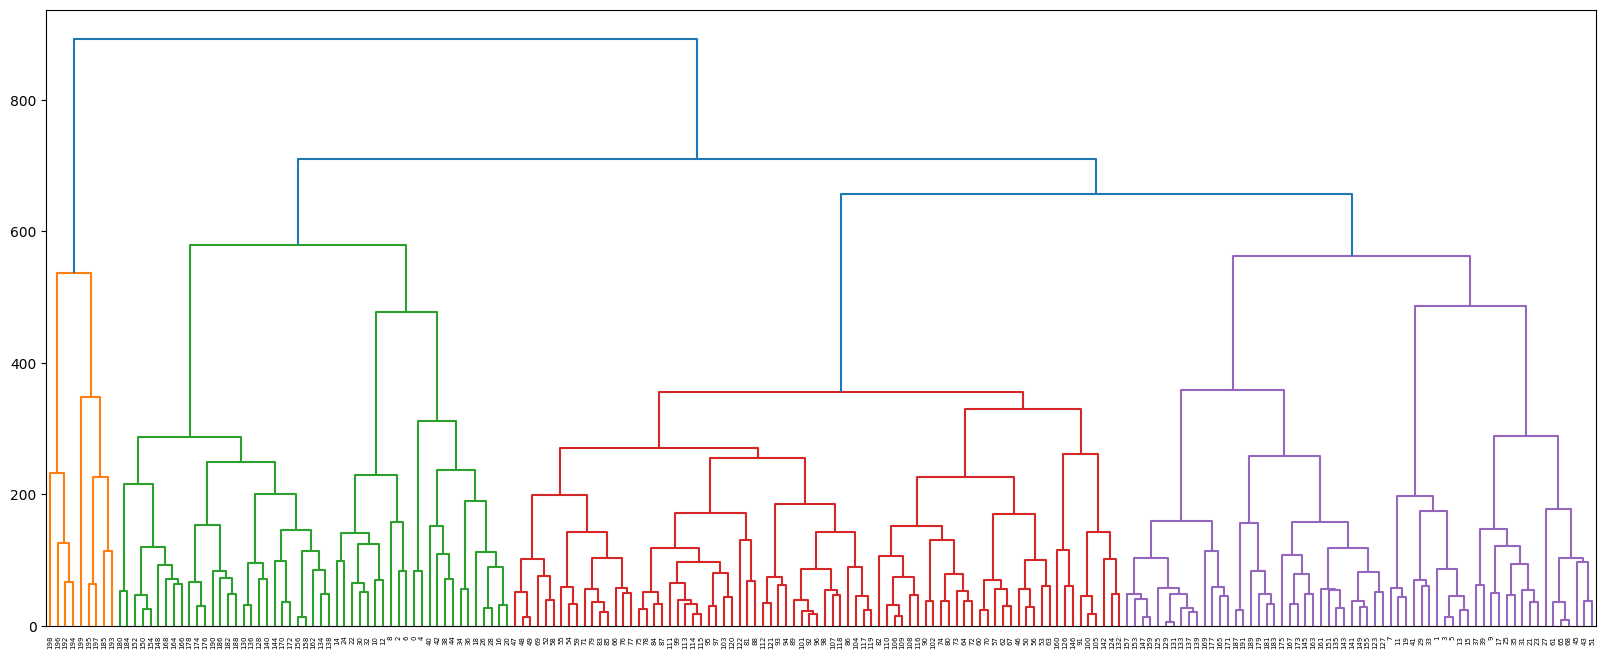

In [51]:
plt.figure(figsize=(20, 8))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(d_mat, method='complete'))

plt.show()



**Висновки з завдання 12 (детальні)**

1. Спрочатку я побудував матрицю відстаней.
2. Далі я перевірив параметри зв’язку і вибрав метод `complete` бо він на мою думку працює найкраще.
3. Далі за допомогою методу hierarchy.dendrogram використовуючи матрицю відстаней та метод `complete` створив дендрограму і вивів її.

**Завдання 13** 

А тепер зробимо порівняльний аналіз отриманих результатів кластеризації розглянутими методами:  
* В фінальних візуалізаціях треба використовувати **однакову** (на вашу думку оптимальну) кількість кластерів!!!  

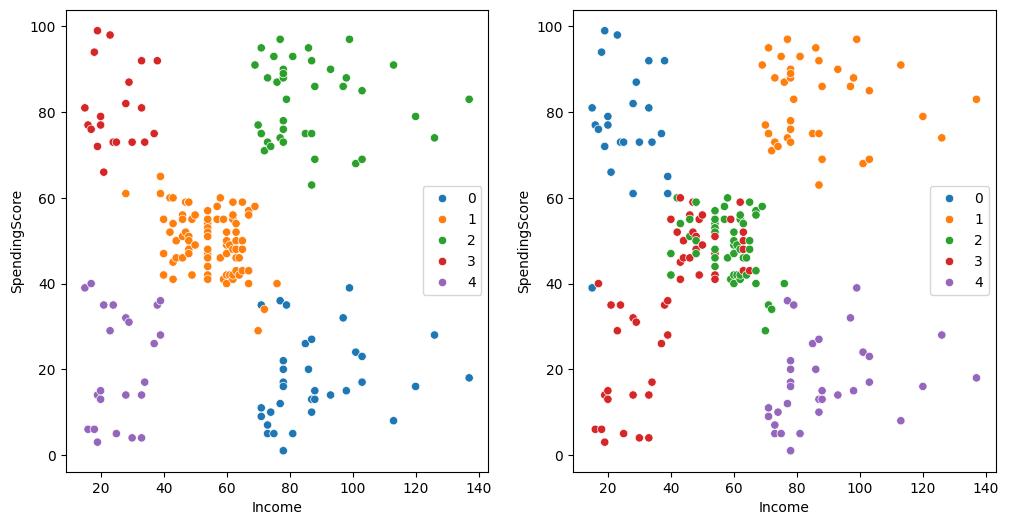

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(customer_set, x='Income', y='SpendingScore', hue=labels, ax=axs[0], palette='tab10')
sns.scatterplot(customer_set, x='Income', y='SpendingScore', hue=kmeans5.labels_, ax=axs[1], palette='tab10')

plt.show()

**Висновки з завдання 13 (детальні)**

1. На першій візуалізації розподілення за допомогою агломеративного кластерування з 5 класами. На другій за допомогою К-середніх.
2. Агломеративне кластерування справилося зі своєю задачею краще за метод К-середніх.